# Heeeeeeello, 🖤كسلت ادورلكم على ميمز انهارده ف خدوا قلب 
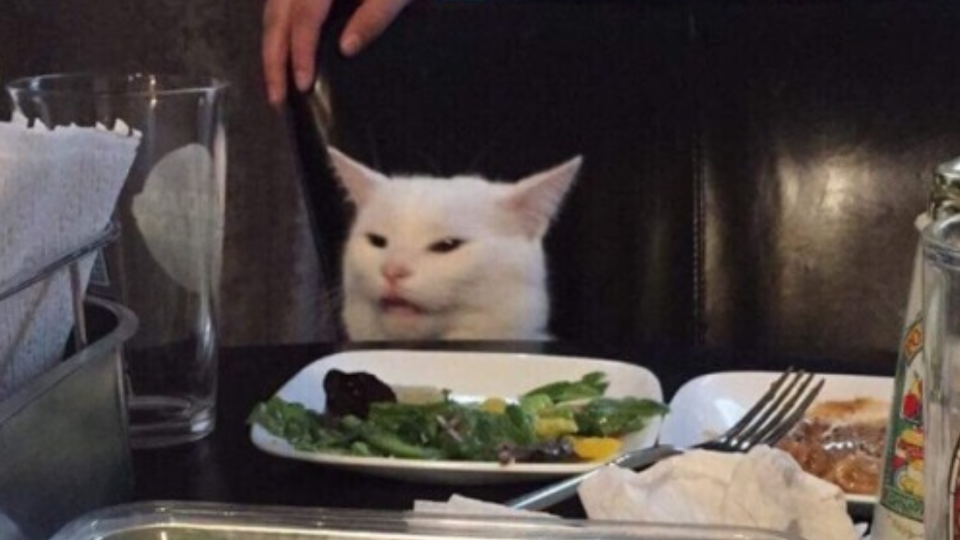

# After being a typical wierdo, let's talk about Classification!
## it's all about giving probability for each data and within a threshold 
# let's assume data with +80% is a class and +50% is another class and so on
## some examples:
- breads of animals
- types of food
- diseases 
- image recognition for self driving cars
- sentiment analysis
- etc. etc.

# Today we will be exploring the classification models
# But first let me take a selfie! - L A M E -
# nah we will be doing the usual stuff of collecting and cleaning the data 😪

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Data

In [3]:
df = pd.read_csv( 'mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## obviously class is the label 

In [4]:
# to be sure let's see our classes
df['class'].unique()

array(['p', 'e'], dtype=object)

## let's seperate our labels in a y variable and features in another x variable

In [5]:
y=df['class']
X=df.drop(columns=['class'])


In [6]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [7]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


## now we have our features and our labels
## but notice that the values are all categorical!!
## let's solve this by creating another features and labels with one-hot-encoding

In [8]:
pd.get_dummies( df ).head() # columns : list-like, default None Column names in the DataFrame to be encoded.  
                                                                               # If `columns` is None then all the columns with
                                                                               # `object` or `category` dtype will be converted.

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## notice the number of columns?! 
## in the last session of the traditional ML we will talk about how to tackle these problems

## now let's do the same with X and y to save time

In [9]:
X_dum=pd.get_dummies(X ,drop_first=True )
y_dum=pd.get_dummies(y,drop_first=True)

In [10]:
X_dum.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
y_dum.head()

,p
0,1
1,0
2,0
3,1
4,0


## let's devide the data for training and testing

In [12]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X , y )

In [13]:
print(f' train data: {len(X_train)}' )
print(f' train label: {len(y_train)}' )
print()
print(f' test data: {len(X_test)}' )
print(f' test label: {len(y_test)}' )

 train data: 6093
 train label: 6093

 test data: 2031
 test label: 2031


In [14]:
from sklearn.model_selection import train_test_split
X_traind , X_testd , y_traind , y_testd = train_test_split( X_dum , y_dum )

In [15]:
print(f' train data: {len(X_traind)}' )
print(f' train label: {len(y_traind)}' )
print()
print(f' test data: {len(X_testd)}' )
print(f' test label: {len(y_testd)}' )

 train data: 6093
 train label: 6093

 test data: 2031
 test label: 2031


## now we have cleared the data and we are ready to use it
## let's get to the machine learning part
## notice how we spend more time cleaning and preparing the data than actually playing with models

# Logistic Regression 
## it creates probabilities for the data points and the data above certain threshold 
## is considered one class and below that is the other class
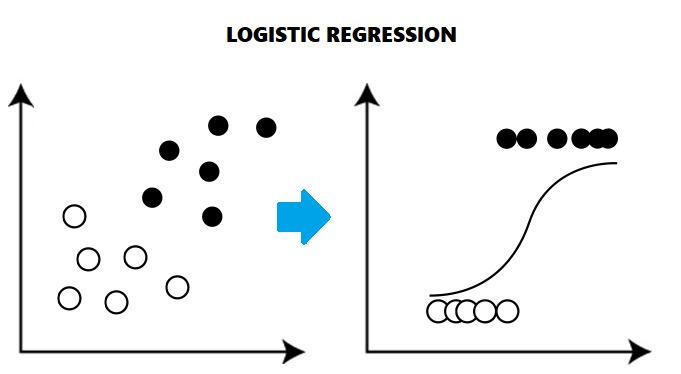
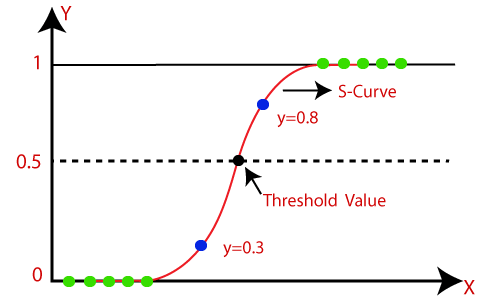
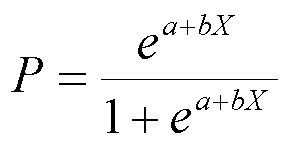

In [16]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_traind , y_traind)

print(f'lr train score: { lr.score( X_traind , y_traind ) }')
print(f'lr test score: { lr.score(X_testd , y_testd) }')

lr train score: 0.9996717544723454
lr test score: 0.999507631708518


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# K-Nearest Neighbours Classifier
## remember how the K-Nearest Neighbours regression works? 🤔
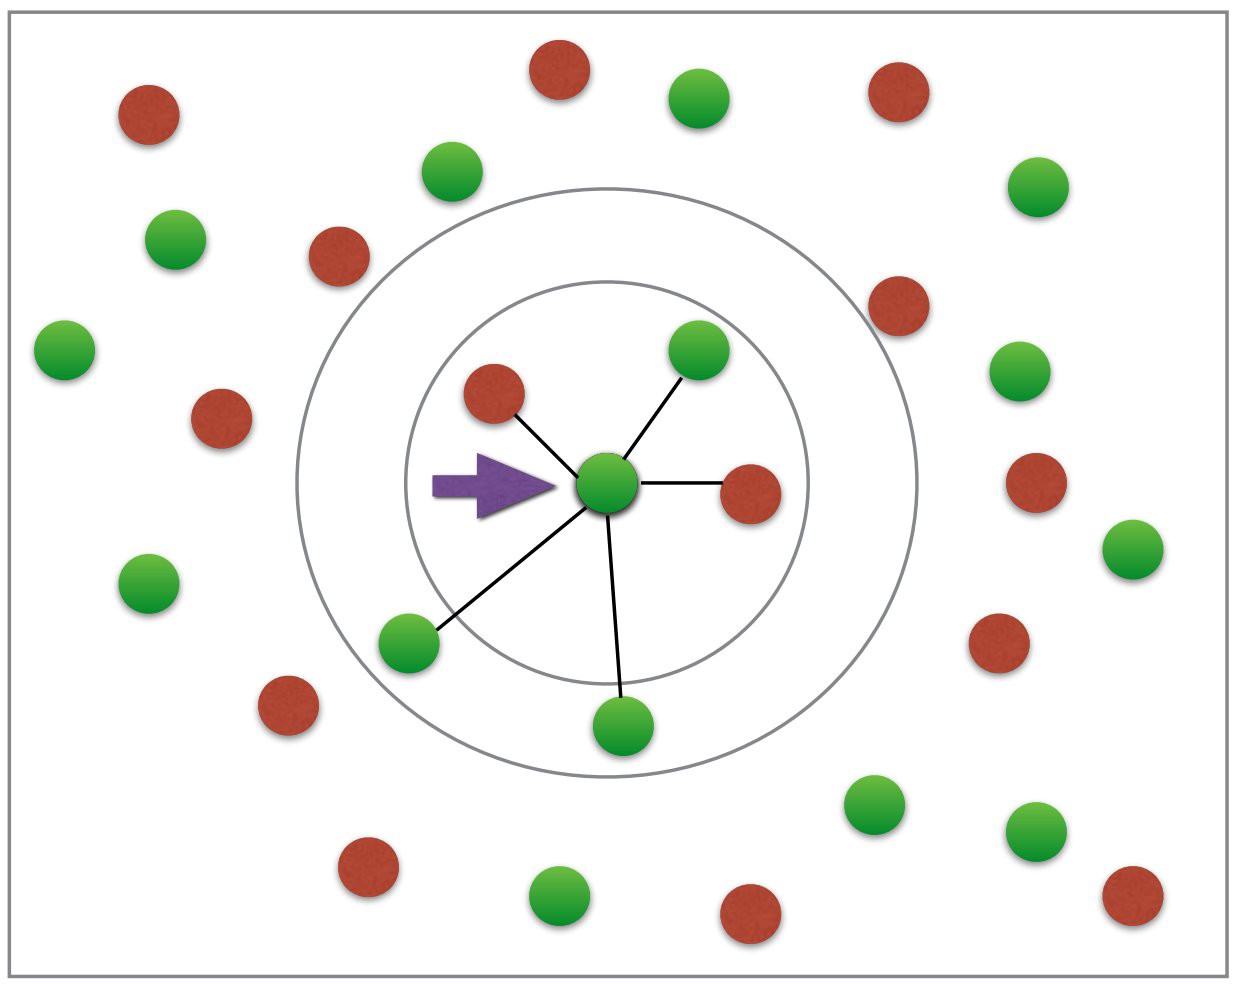

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_traind , y_traind)
print(f'knn train score: { knn.score( X_traind , y_traind ) }')
print(f'knn test score: { knn.score(X_testd , y_testd) }')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


knn train score: 1.0
knn test score: 1.0


## let's try the same in a for loop and change the number of neighbors

In [18]:
for k in [ 2,4,8,12,20] :  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_traind , y_traind)
    print(f'knn train score: { knn.score( X_traind , y_traind ) } for k = {k}')
    print(f'knn test score: { knn.score(X_testd , y_testd) } for k = {k}')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


knn train score: 1.0 for k = 2
knn test score: 1.0 for k = 2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


knn train score: 1.0 for k = 4
knn test score: 1.0 for k = 4


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


knn train score: 1.0 for k = 8
knn test score: 1.0 for k = 8


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


knn train score: 0.9991793861808633 for k = 12
knn test score: 0.9985228951255539 for k = 12


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


knn train score: 0.9991793861808633 for k = 20
knn test score: 0.9985228951255539 for k = 20


# Descision Tree
## simple and effective way to devide your data into regions with operations >,<,=
## just by asking questions, you can represent it as if conditions 
### let's give an example of fruits, is the fruit large or big or small , is the color red or yellow or green , is it shaped like a ball or rod, and so on untill you know the type of the fruit
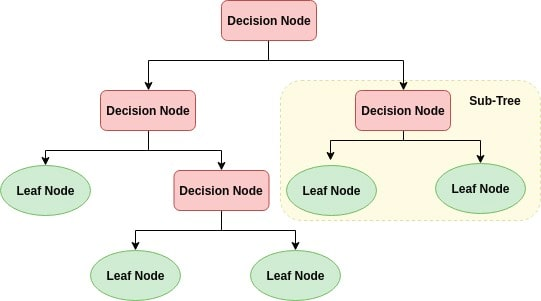

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_traind ,y_traind)
print(f'tree train score: { tree.score( X_traind , y_traind ) }')
print(f'tree test score: { tree.score(X_testd , y_testd ) }')

tree train score: 0.9844083374364024
tree test score: 0.9876907927129492


### let's try different depths?


In [20]:
for d in [3,6,8,12]:
    tree = DecisionTreeClassifier(max_depth=3)
    tree.fit(X_traind ,y_traind)
    print(f'tree train score: { tree.score( X_traind , y_traind ) }')
    print(f'tree test score: { tree.score(X_testd , y_testd ) }')

tree train score: 0.9844083374364024
tree test score: 0.9876907927129492
tree train score: 0.9844083374364024
tree test score: 0.9876907927129492
tree train score: 0.9844083374364024
tree test score: 0.9876907927129492
tree train score: 0.9844083374364024
tree test score: 0.9876907927129492


### as you can see the problem is not with the depth of the tree, always check the available parameters you can change 

In [21]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

In [22]:
tree = DecisionTreeClassifier()
tree.fit(X_traind ,y_traind)
print(f'tree train score: { tree.score( X_traind , y_traind ) }')
print(f'tree test score: { tree.score(X_testd , y_testd ) }')

tree train score: 1.0
tree test score: 1.0


### WOW?! see? sometimes you don't even have to provide parameters and the defacto is already enough ;)

# SVM ( Support Vector Machine )
## it's a great model with many many compination of parameters to tune 
## it tries to split the data with a hyperplane having the same margin between 
## it's hyperplane and data from each class, it finds the center of the gap between 
## the two classes
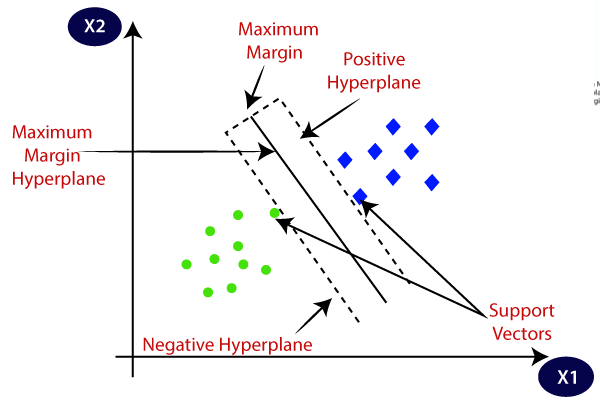
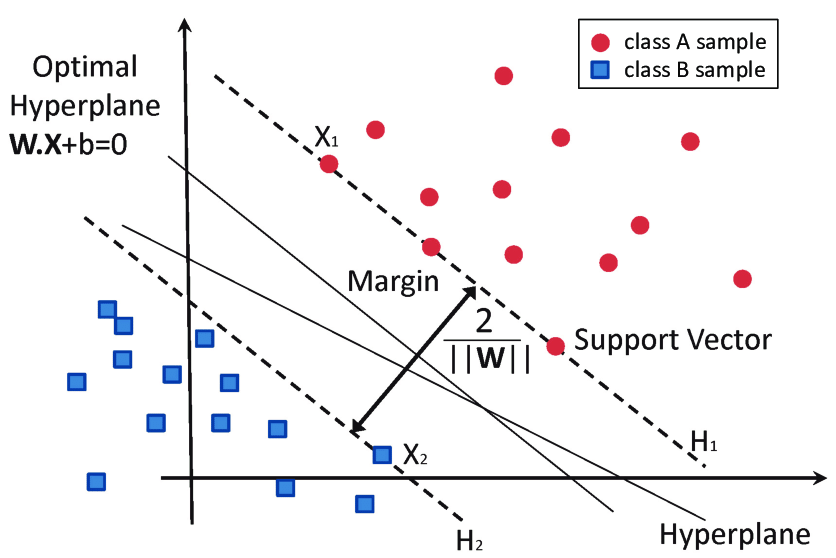

In [23]:
from sklearn.svm import SVC # c for classifier 

svc = SVC(kernel='rbf', C=1)
svc.fit(X_traind , y_traind)
print(f'svc train score: { svc.score( X_traind , y_traind ) }')
print(f'svc test score: { svc.score(X_testd , y_testd ) }')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


svc train score: 1.0
svc test score: 1.0


In [24]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

# Naive Bays
## it's the simplest model yet a great performer in some tasks 
## it supposes that each feature is independent of each other 
## and calculates the effect of that feature on the outcome
## which is not always the case, that's why it's called naive
## and it's highly depended on probabilities
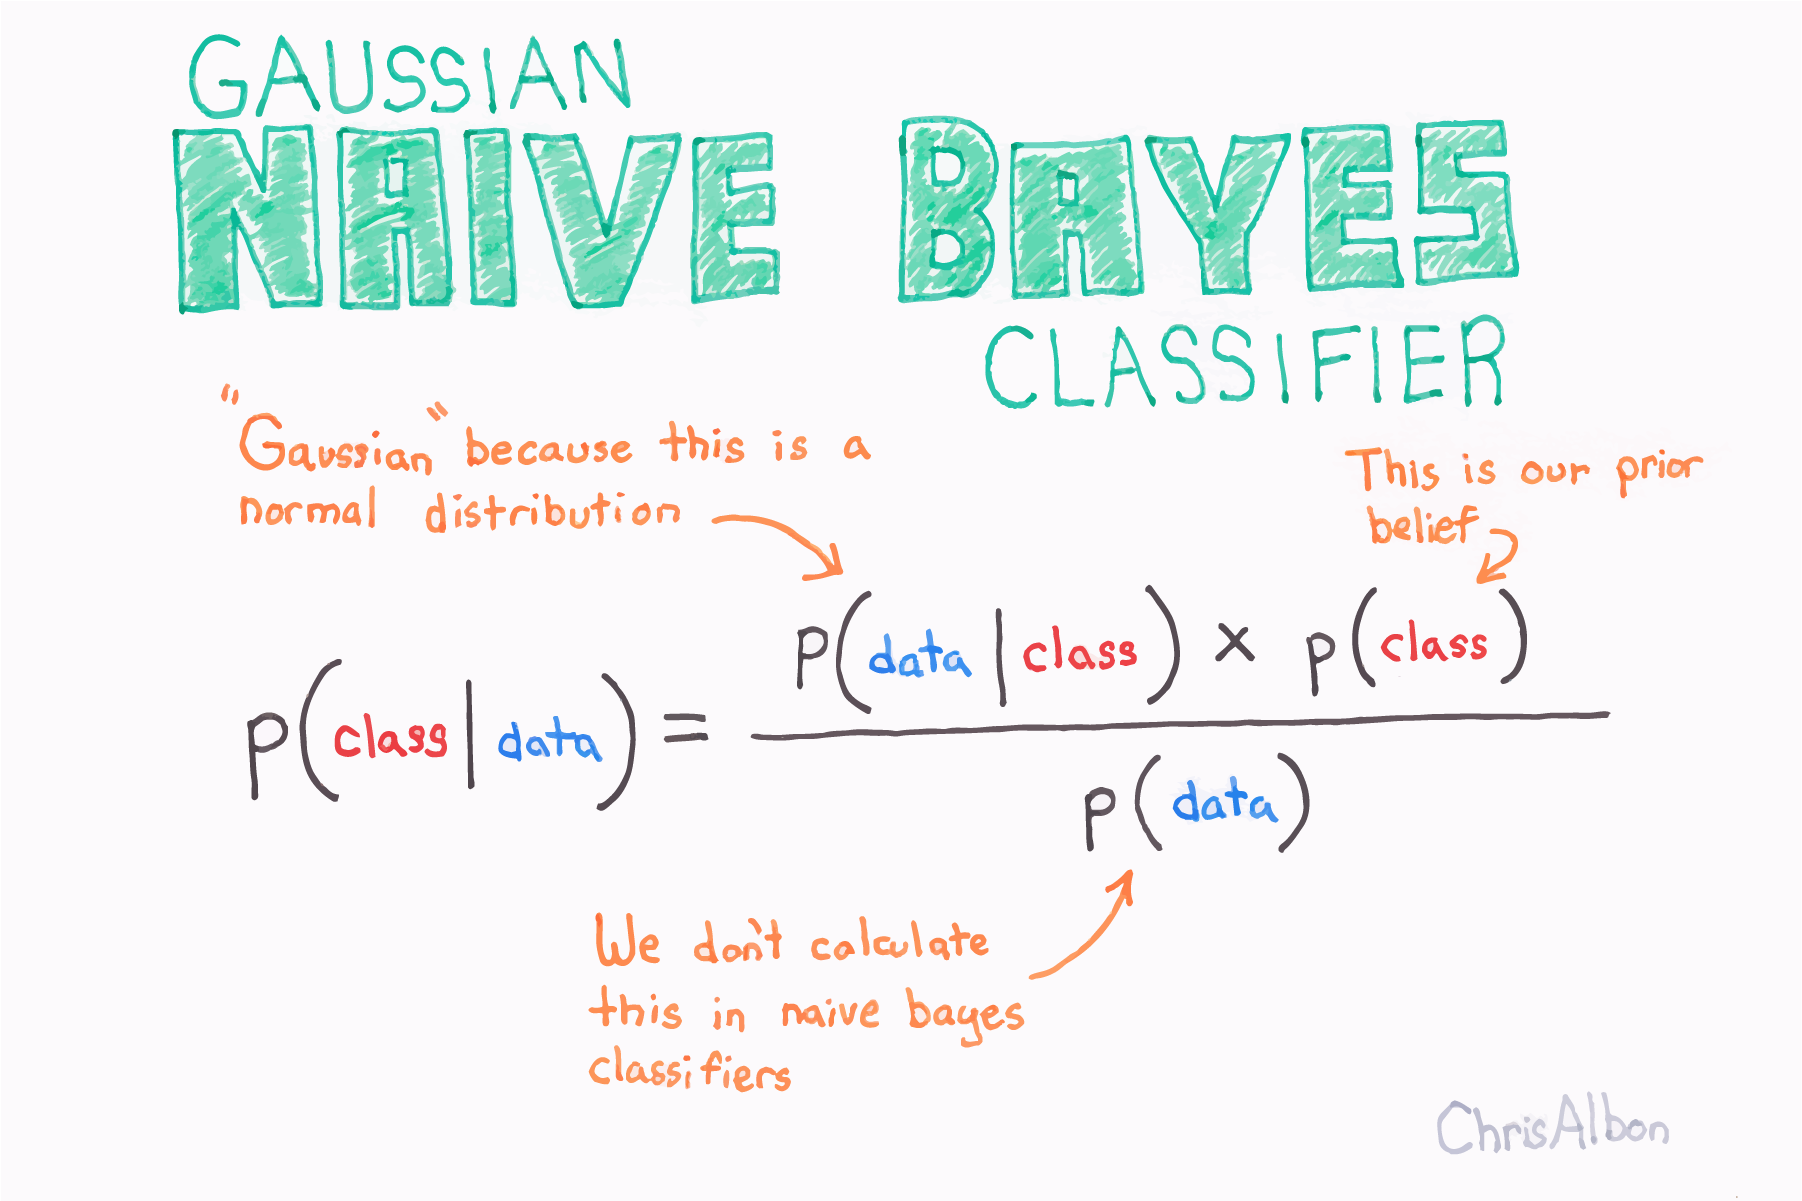

In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_traind , y_traind)
print(f'nb train score: { nb.score( X_traind , y_traind ) }')
print(f'nb test score: { nb.score(X_testd , y_testd ) }')

nb train score: 0.9453471196454948
nb test score: 0.9517479074347612


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# This is the End of today's session
# Hope you had fun!
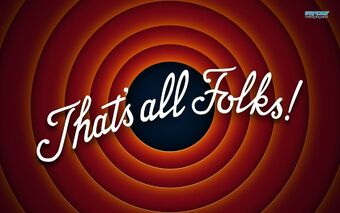

# Now with a commercial break to avoid the disconnection from last session :v

In [26]:
from IPython.display import Video
#Video("S://DSC 2020/PLEASE-STAND-BY.mp4", embed=True, width=1100, height=680)